In [ ]:
#correlations of compartment scores between replicates

In [16]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec

In [8]:
outDataDir = '..'

In [9]:
#conditions
conditions = [
    'WT_Ctrl_R1',
    'WT_ATRA_R1',
    'Top2BKO_Ctrl_R1',
    'Top2BKO_ATRA_R1',
    'WT_Ctrl_R2',
    'WT_ATRA_R2',
    'Top2BKO_Ctrl_R2',
    'Top2BKO_ATRA_R2',
    'WT_Ctrl_R1R2',
    'WT_ATRA_R1R2',
    'Top2BKO_Ctrl_R1R2',
    'Top2BKO_ATRA_R1R2'
]

long_names = {
    'WT_Ctrl_R1' : 'CA-HiC-Dpn-SH-SY5Y-WT-Ctrl-4-51-R1-T1',
    'WT_ATRA_R1' : 'CA-HiC-Dpn-SH-SY5Y-WT-ATRA-5days-4-51-R1-T1',
    'Top2BKO_Ctrl_R1' : 'CA-HiC-Dpn-SH-SY5Y-BKO98-Ctrl-4-51-R1-T1',
    'Top2BKO_ATRA_R1' : 'CA-HiC-Dpn-SH-SY5Y-BKO98-ATRA-5days-4-51-R1-T1',
    'WT_Ctrl_R2' : 'CA-HiC-Dpn-SH-SY5Y-WT-Ctrl-4-52-R2-T1',
    'WT_ATRA_R2' : 'CA-HiC-Dpn-SH-SY5Y-WT-ATRA-5days-4-52-R2-T1',
    'Top2BKO_Ctrl_R2' : 'CA-HiC-Dpn-SH-SY5Y-BKO98-Ctrl-4-52-R2-T1',
    'Top2BKO_ATRA_R2' : 'CA-HiC-Dpn-SH-SY5Y-BKO98-ATRA-5days-4-52-R2-T1',
    'WT_Ctrl_R1R2' : 'CA-HiC-Dpn-SH-SY5Y-WT-Ctrl-4-51-and-4-52-R1R2',
    'WT_ATRA_R1R2' : 'CA-HiC-Dpn-SH-SY5Y-WT-ATRA-5days-4-51-and-4-52-R1R2',
    'Top2BKO_Ctrl_R1R2' : 'CA-HiC-Dpn-SH-SY5Y-BKO98-Ctrl-4-51-and-4-52-R1R2',
    'Top2BKO_ATRA_R1R2' : 'CA-HiC-Dpn-SH-SY5Y-BKO98-ATRA-5days-4-51-and-4-52-R1R2'
}

In [10]:
eigs_250kb = {}
eigs_100kb = {}
eigs_50kb = {}

In [12]:
#read in eigs
for cond in conditions:
    eigs_250kb[cond] = pd.read_csv(
        f'{outDataDir}/data/{long_names[cond]}.250kb.mapq30.byarm.eigs.cis.vecs.txt', sep = '\t')
    eigs_100kb[cond] = pd.read_csv(
        f'{outDataDir}/data/{long_names[cond]}.100kb.mapq30.byarm.eigs.cis.vecs.txt', sep = '\t')
    eigs_50kb[cond] = pd.read_csv(
        f'{outDataDir}/data/{long_names[cond]}.50kb.mapq30.byarm.eigs.cis.vecs.txt', sep = '\t')

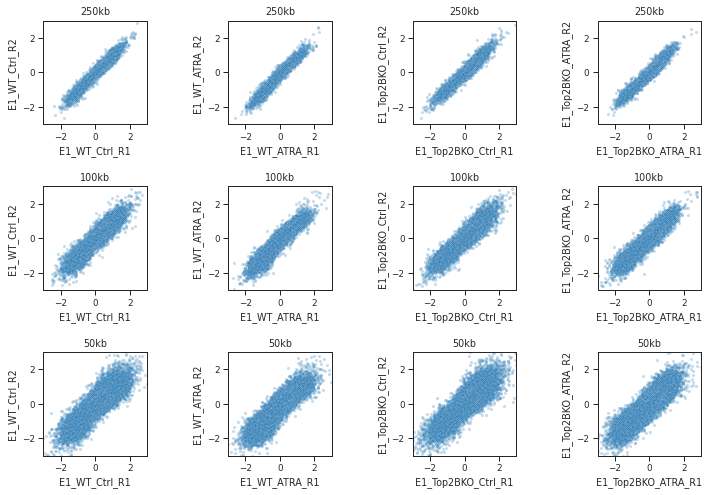

In [48]:
correlations = pd.DataFrame(columns = ['r', 'p', 'cond', 'binsize'])
binsizes = ['250kb', '100kb', '50kb']

sns.set_style("ticks")
sns.set_context("paper")
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(nrows= 3, ncols=4, wspace = 0.6, hspace = 0.6)

for i, (rep1, rep2, rep12) in enumerate(zip(conditions[0:4], conditions[4:8], conditions[8:12])):
    for j, eigs in enumerate([eigs_250kb, eigs_100kb, eigs_50kb]):
        ax = plt.subplot(gs[j, i])
        ev1 = eigs[rep1]
        ev2 = eigs[rep2]
        eigdf = ev1.merge(ev2, on = ['chrom', 'start', 'end'], suffixes = (f'_{rep1}', f'_{rep2}')).dropna()
        sns.scatterplot(data = eigdf, x=f'E1_{rep1}', y=f'E1_{rep2}', alpha = 0.25, s = 10, ax = ax)
        ax.set_aspect('equal')
        #sns.lmplot(data = eigdf, x=f'E1_{rep1}', y=f'E1_{rep2}')
        cor = stats.pearsonr(x=eigdf[f'E1_{rep1}'], y=eigdf[f'E1_{rep2}'])
        cordf = pd.DataFrame({'r' : cor[0],
                              'p' : cor[1],
                              'cond' : rep12,
                              'binsize' : binsizes[j]
                             }, index = [0])
        correlations = pd.concat([correlations, cordf], ignore_index = False).reset_index(
            drop = True)
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)
        plt.title(f'{binsizes[j]}')
plt.savefig(f'{outDataDir}/figures/eig1_correlation_between_reps_by_binsize.png', dpi = 300, bbox_inches = 'tight')        

In [47]:
correlations

,r,p,cond,binsize
0,0.969485,0.0,WT_Ctrl_R1R2,250kb
1,0.930736,0.0,WT_Ctrl_R1R2,100kb
2,0.877179,0.0,WT_Ctrl_R1R2,50kb
3,0.970814,0.0,WT_ATRA_R1R2,250kb
4,0.944236,0.0,WT_ATRA_R1R2,100kb
5,0.904171,0.0,WT_ATRA_R1R2,50kb
6,0.960994,0.0,Top2BKO_Ctrl_R1R2,250kb
7,0.92099,0.0,Top2BKO_Ctrl_R1R2,100kb
8,0.864581,0.0,Top2BKO_Ctrl_R1R2,50kb
9,0.965634,0.0,Top2BKO_ATRA_R1R2,250kb


In [49]:
correlations.to_csv(f'{outDataDir}/data/eig1_correlations_between_reps_by_binsize.txt', sep = '\t', index = False)